# Prepare simulation

Test My Telescope cloned from Telescope of Philippe Gris

- author : Sylvie Dagoret-Campagne
- date   : Jun 29th 2018
- update : Jul 4th 2018


In [371]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [372]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import numpy as np
import sys
import os
import pandas as pd
import glob
from matplotlib.backends.backend_pdf import PdfPages 

In [373]:
from astropy.io import fits

In [374]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),   #defines the default image size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [375]:
from lsst.sims.photUtils import SignalToNoise
from lsst.sims.photUtils import PhotometricParameters
from lsst.sims.photUtils import Bandpass,Sed

In [376]:
from MyTelescope import *
from MyThroughputs import *

In [377]:
tel=Telescope(airmass=1.5)

**** Throughputs.__init__****
System loaded from /sps/lsst/software/lsst_sims/sims_2_7_0/stack/miniconda3-4.3.21-10a4fa6/Linux64/throughputs/2017.01.31-6-g29ce4f5/baseline/
**** Telescope.__init__******
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0


# Definition of SED files

- Picles in units erg/cm2/s/nm

In [378]:
sed_file="regenerated_sedgrid_pickle_uvi.fits"

In [379]:
sed_hdu = fits.open(sed_file)

In [380]:
theheader=sed_hdu[0].header
theheader

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8005                                                  
NAXIS2  =                12963                                                  
NBSED   =                12962                                                  
NBWLBIN =                 8000                                                  
WLMIN   =               3000.0                                                  
WLMAX   =              11000.0                                                  
WLBINWDT=                  1.0                                                  
SEDUNIT = 'FLAM    '                                                            
SEDMODEL= 'pickle_uvi'                                                          
IDX_NUM =                   

In [381]:
sidx_num=theheader['IDX_NUM']
sidx_val=theheader['IDX_VAL']
sidx_sed=theheader['IDX_SED']
sidx_data=theheader['IDX_DATA']
sidx_spec=theheader['IDX_SPEC']

# Definition of Cadence file summary

In [382]:
cadence_atm_program_file='cadence_field1000.csv'

In [383]:
df=pd.read_csv(cadence_atm_program_file,index_col=False)

In [384]:
df.head()

,Unnamed: 0,obshistid,nights,expdate,expmjd,airmass,filter,finseeing,transparency,filtskybrightness,fiveSigmaDepth,rawseeing,humidity
0,0,127633,173,14965194,59753.208268,1.370996,g,1.160634,0.25,21.732956,24.241311,0.704040,0.0
1,1,127670,173,14966692,59753.225609,1.274001,g,1.303756,0.25,21.791891,24.160844,0.859973,0.0
2,2,136947,189,16353504,59769.276675,1.025141,z,0.695528,0.00,19.037479,23.215870,0.504610,0.0
3,3,136993,189,16355480,59769.299544,1.012049,z,0.659361,0.00,19.223263,23.364350,0.462390,0.0
4,4,137990,190,16439213,59770.268672,1.030291,y,0.782293,0.00,17.300000,21.767917,0.633086,0.0


# Definition of atmospheric file

In [385]:
atmospheric_file='cadence_field1000_atm_sim_{}.fits'.format(1)

In [386]:
hdu = fits.open(atmospheric_file)

In [387]:
hdu.info()

Filename: cadence_field1000_atm_sim_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (960, 913)   float64   


In [388]:
theheader=hdu[0].header
theheader

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  960                                                  
NAXIS2  =                  913                                                  
NBATMSIM=                  912                                                  
ID_NUM  =                    0                                                  
ID_NIGHT=                    1                                                  
ID_DATE =                    2                                                  
ID_EXMJD=                    3                                                  
ID_AM   =                    4                                                  
ID_FILT =                    5                                                  
ID_VAOD =                   

In [389]:
idx_num=theheader['ID_NUM']
idx_night=theheader['ID_NIGHT']
idx_date=theheader['ID_DATE']
idx_date=theheader['ID_EXMJD']
idx_am=theheader['ID_AM']
idx_filt=theheader['ID_FILT']
idx_vaod=theheader['ID_VAOD']
idx_pwv=theheader['ID_PWV']
idx_o3=theheader['ID_O3']
idx_res=theheader['ID_RES']

In [390]:
atmdata=hdu[0].data

In [391]:
NBATM=atmdata.shape[0]-1

# Check Atm Simulations

In [392]:
am=atmdata[1:,idx_am] # airmass distribution
filt=atmdata[1:,idx_filt] # filter distribution
vaod=atmdata[1:,idx_vaod] # aerosols distribution
pwv=atmdata[1:,idx_pwv] # pwv distribution
o3=atmdata[1:,idx_o3] # o3 distribution

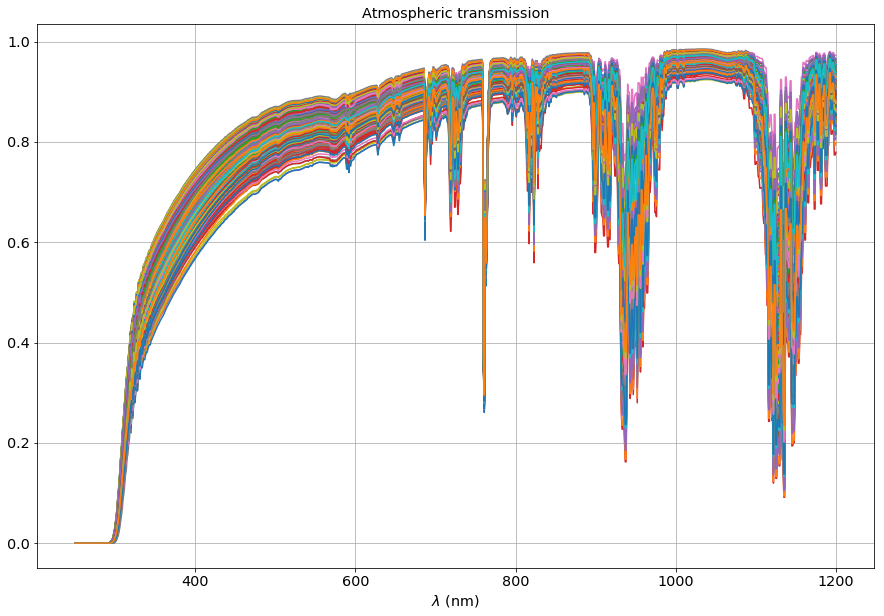

In [393]:
for count in np.arange(NBATM):
    plt.plot(atmdata[0,idx_res:],atmdata[count+1,idx_res:])
plt.grid(True)
plt.title("Atmospheric transmission")
plt.xlabel("$\lambda$ (nm)")

In [394]:
tel=Telescope()

**** Throughputs.__init__****
System loaded from /sps/lsst/software/lsst_sims/sims_2_7_0/stack/miniconda3-4.3.21-10a4fa6/Linux64/throughputs/2017.01.31-6-g29ce4f5/baseline/
**** Telescope.__init__******
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0


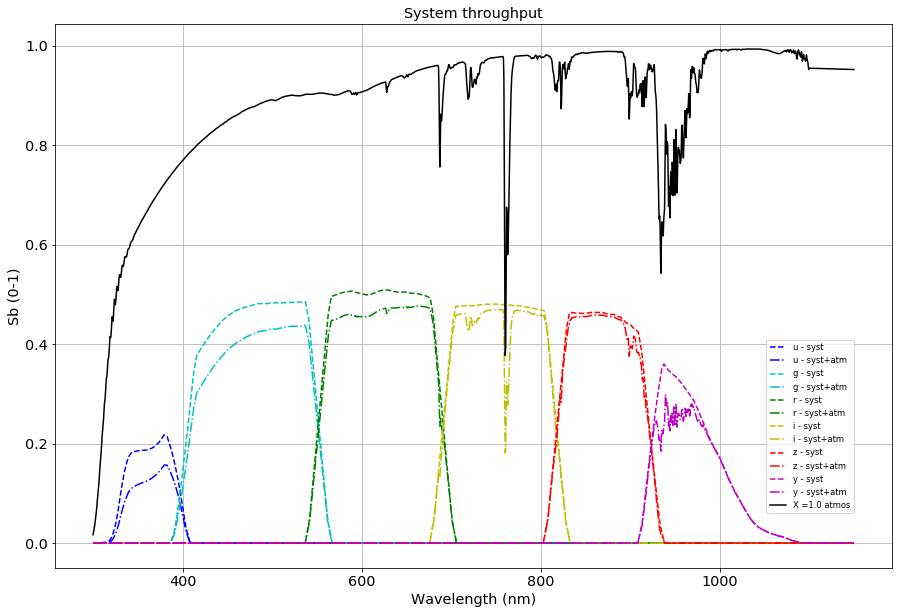

In [395]:
tel.Plot_Throughputs()

# Set an observation atmosphere

In [396]:
idx=1
am=atmdata[idx,idx_am] 
wl=atmdata[0,idx_res:]
tr=atmdata[idx,idx_res:]

In [397]:
wl.shape

(951,)

In [398]:
tr.shape

(951,)

In [399]:
tel.Set_Atmosphere(am,wl,tr)

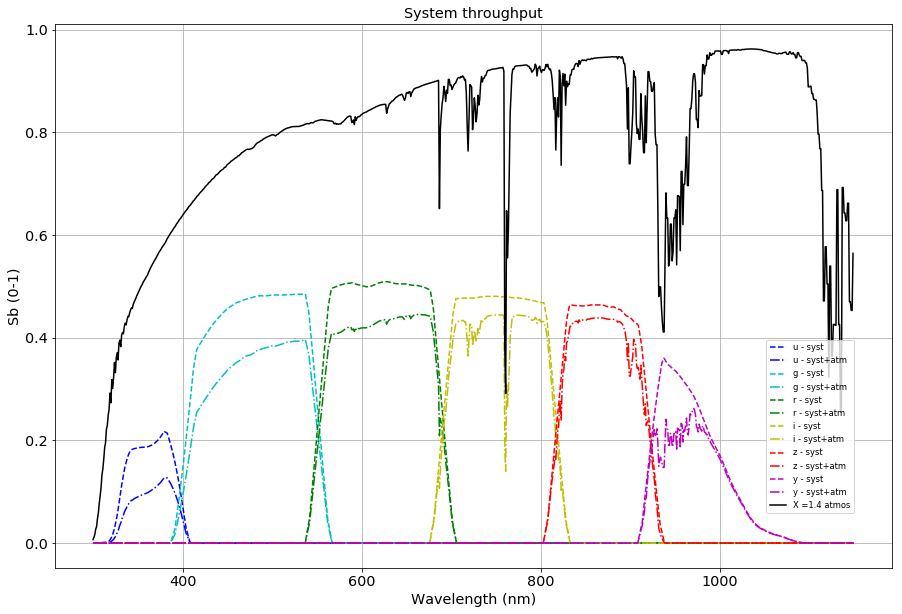

In [400]:
tel.Plot_Throughputs()

In [401]:
tel.Set_SEDAB()

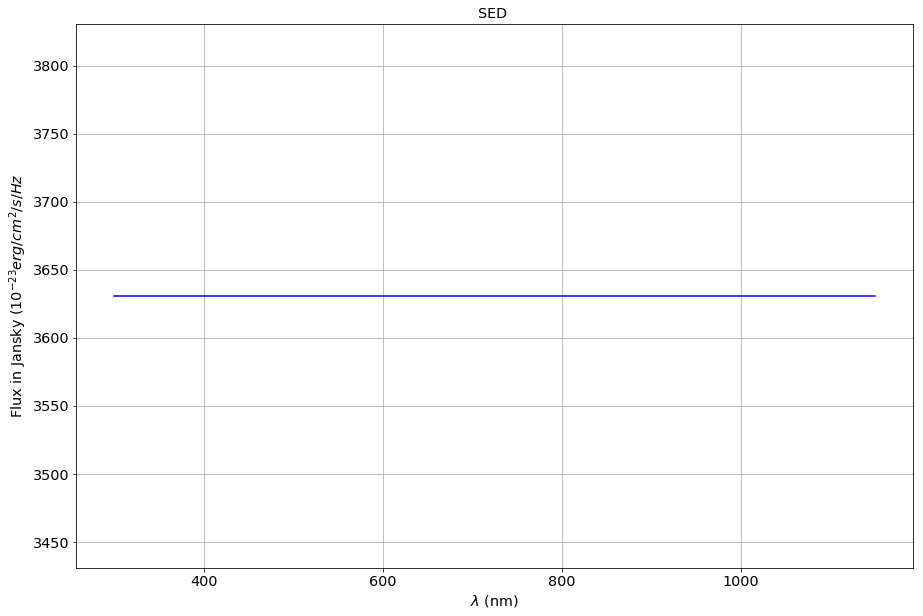

In [402]:
tel.Plot_SED()

In [403]:
tel.CalcMyMagnitudes()

CalcMyMagnitudes :: band = 0, mag1= 3630.7805477010033 , mag2= 68.20403711929208
CalcMyMagnitudes :: band = 1, mag1= 3630.780547701004 , mag2= 394.6257886159582
CalcMyMagnitudes :: band = 2, mag1= 3630.7805477010033 , mag2= 347.78388845896365
CalcMyMagnitudes :: band = 3, mag1= 3630.7805477010033 , mag2= 258.08010008969563
CalcMyMagnitudes :: band = 4, mag1= 3630.7805477010033 , mag2= 179.7630693170709
CalcMyMagnitudes :: band = 5, mag1= 3630.7805477010033 , mag2= 80.36936822462381


(array([ 3630.7805477,  3630.7805477,  3630.7805477,  3630.7805477,
         3630.7805477,  3630.7805477]),
 array([  68.20403712,  394.62578862,  347.78388846,  258.08010009,
         179.76306932,   80.36936822]))

In [404]:
dsfsdsdqfqds

NameError: name 'dsfsdsdqfqds' is not defined

# Calculation of M5

This calculation is conformed wrt that of cadence MINION\_1016

In [ ]:
tel.m5

# Calculation of Sky magnitude 
This calculation is conformed wrt that of candence MINION\_1016

In [ ]:
tel.mag_sky

# Tb

In [ ]:
tel.Tb

# Sigmab

In [ ]:
tel.Sigmab

# zp

In [ ]:
tel.zp

# ADU_zp

In [ ]:
tel.ADU_zp

# Flux Sky

In [ ]:
tel.flux_sky

# Telescope Throughput

In [ ]:
tel.Plot_Throughputs()

In [ ]:
thrpt=Throughputs(airmass=1.3)

In [ ]:
for i,band in enumerate(thrpt.filterlist):
    #plt.plot(self.lsst_std[band].wavelen,self.lsst_std[band].sb,linestyle='-',color=self.filtercolors[band], label='%s - std' %(band))
    plt.plot(thrpt.lsst_system[band].wavelen,thrpt.lsst_system[band].sb,linestyle='--',color=thrpt.filtercolors[band], label='%s - syst' %(band))
plt.grid()

In [ ]:
df=pd.DataFrame({"wlu":thrpt.lsst_system['u'].wavelen,"u":thrpt.lsst_system['u'].sb,
                "wlg":thrpt.lsst_system['g'].wavelen,"g":thrpt.lsst_system['g'].sb,
                "wlr":thrpt.lsst_system['r'].wavelen,"r":thrpt.lsst_system['r'].sb,
                "wli":thrpt.lsst_system['i'].wavelen,"i":thrpt.lsst_system['i'].sb,
                "wlz":thrpt.lsst_system['z'].wavelen,"z":thrpt.lsst_system['z'].sb,
                "wly":thrpt.lsst_system['y'].wavelen,"y":thrpt.lsst_system['y'].sb}
               )

In [ ]:
df

# Check the Dark-sky SED

In [ ]:
thrpt.Plot_DarkSky()

# Test of SED of type AB source

$$
S_\lambda (\lambda) = \frac{c}{\lambda^2} S_\nu(\lambda)
$$

In [ ]:
M0=48.6           # magnitude of a AB source
S_nu0=10**(-M0/2.5) # flux in erg/cm2/s/Hz : 3.630780547701003e-20
c=2.99792458e10    # speed of light in cm/s in CGS
nm_to_cm=1e-7      # conversion nm to cm 

In [ ]:
wavelength=np.arange(300.,1151.,1)

In [ ]:
S_lambda0=S_nu0*c/(nm_to_cm)/wavelength**2   # in erg/cm2/s/nm

In [ ]:
plt.plot(wavelength,S_lambda0)

In [ ]:
mysed=Sed(wavelen=wavelength, flambda=S_lambda0, fnu=None, name='AB source')

In [ ]:
mysed.flambdaTofnu()

In [ ]:
wl,fnu=mysed.getSED_fnu()

In [ ]:
plt.plot(wl,fnu)
plt.ylabel("Flux in Jy (unit of $10^23$ erg/cm$^2$/s/Hz)")

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
tel.CalcMyMagnitudes(mysed)

In [ ]:
help(mysed.resampleSED)